In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as wdgt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('Unemployment_Rates.csv')
df.columns = df.columns.str.strip()  # This was obtained by ChatGPT and will remove any leading or trailing spaces from all column names, this was an issue wth the unemployment rate

# This is a basic import file to get the necessary libraries and allows pandas to read the file
# I had issues getting the file to read but i tried restarting my kernel on VScode and it began to work


In [11]:
areas = df["Area"].unique()
dropdown = wdgt.Dropdown(options = areas)
selected_area = None

def on_value_change(change):
    global selected_area
    selected_area = change['new']

dropdown.observe(on_value_change, names='value')

# The code for the function on_value_change and the line below it were obtained from ChatGPT to store the currently selected value into a global variable so that I can use it for the graphs

display(dropdown)

# This gets all the unique areas in the state of New York, I orignally had every value which was over 91,000 so I checked the pandas documentation here (https://pandas.pydata.org/docs/reference/api/pandas.Index.unique.html#pandas.Index.unique)
# and I found the unique keyword which just displays each of then once into the dropdown menu

Dropdown(options=('New York State', 'Albany County', 'Allegany County', 'Bronx County', 'Broome County', 'Catt…

In [12]:
selected_data = df[df['Area'] == selected_area]

unemployment_rates = selected_data['Unemployment Rate']
year = selected_data['Year']
month = selected_data['Month']

print(year)
print(month)
print(unemployment_rates)

# This is retrieving the unemployment rate, month and year


999     2024
1000    2024
1001    2024
1002    2024
1003    2024
        ... 
1409    1990
1410    1990
1411    1990
1412    1990
1413    1990
Name: Year, Length: 415, dtype: int64
999      1
1000     2
1001     3
1002     4
1003     5
        ..
1409     8
1410     9
1411    10
1412    11
1413    12
Name: Month, Length: 415, dtype: int64
999     5.7
1000    5.3
1001    4.8
1002    4.1
1003    4.0
       ... 
1409    5.2
1410    6.0
1411    5.6
1412    6.5
1413    7.7
Name: Unemployment Rate, Length: 415, dtype: float64


In [24]:
covid_filtered_df = df[(df['Area'] == selected_area) & (df['Year'] == 2020)]
post_covid_filtered_df = df[(df['Area'] == selected_area) & (df['Year'] == 2021)]

<Axes: title={'center': 'Allegany County, 2021'}, xlabel='Month', ylabel='Unemployment Rate'>

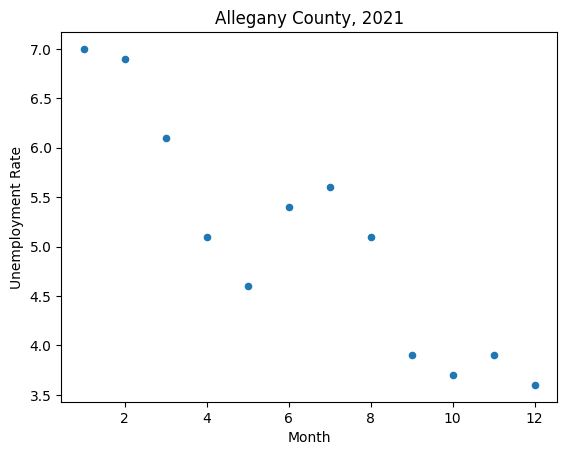

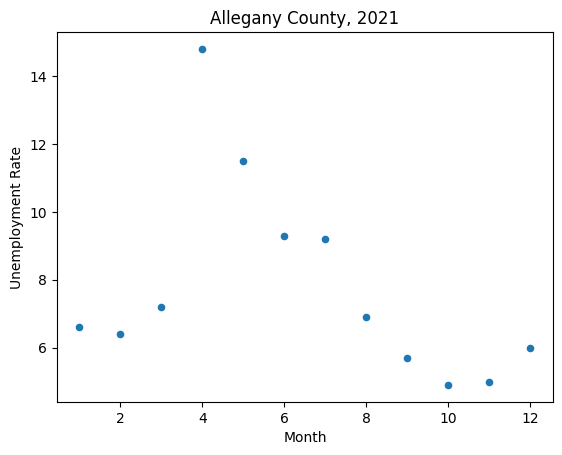

In [25]:
post_covid_filtered_df.plot.scatter(x = 'Month', y = 'Unemployment Rate', title = selected_area + ', 2021')
covid_filtered_df.plot.scatter(x = 'Month', y = 'Unemployment Rate', title = selected_area + ', 2021')

# A big factor that has an affect on my data was covid as you can see it nearly doubles for most areas when the lockdown hit

0.16439777727929905
0.8233311220909868


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


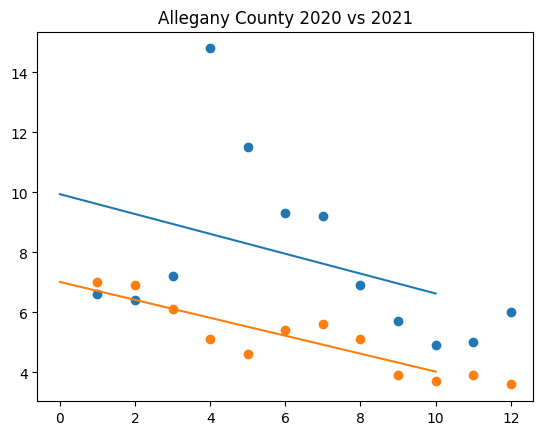

In [34]:
model = LinearRegression(fit_intercept=True)

x = covid_filtered_df[['Month']]
y = covid_filtered_df['Unemployment Rate'] 

model.fit(x,y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.title(selected_area + ', 2020')
plt.scatter(x, y,)
plt.plot(xfit, yfit)
# This is fitting the line to the data

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
print(r2)

model = LinearRegression(fit_intercept=True)

x = post_covid_filtered_df[['Month']]
y = post_covid_filtered_df['Unemployment Rate'] 

model.fit(x,y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.title(selected_area + ' 2020 vs 2021')
plt.scatter(x, y,)
plt.plot(xfit, yfit)

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
print(r2)


# As you can see from the chart below, covid massively affected the unemployments when it hit in april 2020, with unemployment skyrocketing by over 10%
# but it did gradually being to drop as time went on and the initial panic form the pandemic calmed down with 2021 being a good indicator of this as it drops fairly consistently throughout the year
# This is backed up by the accuracy of the charts as 2020 is at 16% as it took a huge spike in april and then had to slowly recover but 2021 was always on the gradual decline and s sitting at an 82%

In [35]:
# From my findings the month is going to be too specific as there are too many points to plot so I am going to combine them into an average for the year 
df = pd.read_csv('Unemployment_rates.csv')

df.columns = df.columns.str.strip()
average_unemployment = df.groupby(['Area', 'Year'])['Unemployment Rate'].mean().reset_index()

# Round the average unemployment rate to one decimal place
average_unemployment['Unemployment Rate'] = average_unemployment['Unemployment Rate'].round(1)

# Step 3: Save the results to a new CSV file
average_unemployment.to_csv('cleaned-unemployment-rates.csv', index=False)


In [36]:
df = pd.read_csv('cleaned-unemployment-rates.csv')
areas = df["Area"].unique()
dropdown = wdgt.Dropdown(options = areas)
new_selected_area = None

def on_value_change(change):
    global new_selected_area
    new_selected_area = change['new']

dropdown.observe(on_value_change, names='value')

# The code for the function on_value_change and the line below it were obtained from ChatGPT to store the currently selected value into a global variable so that I can use it for the graphs

display(dropdown)

Dropdown(options=('Albany City', 'Albany County', 'Albany-Rensselaer-Schenectady Counties', 'Albany-Schenectad…

<Axes: title={'center': 'Balance of State'}, xlabel='Year', ylabel='Unemployment Rate'>

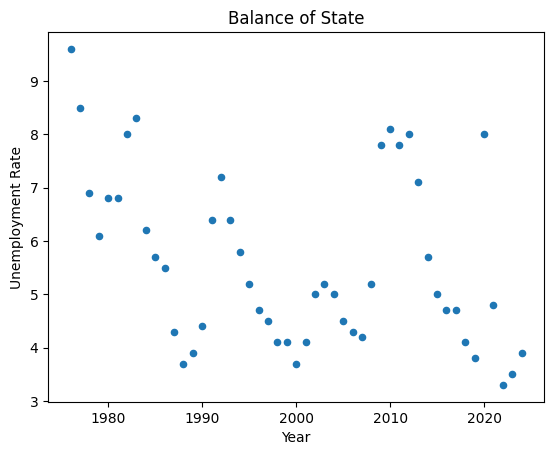

In [38]:
filtered_df = df[df['Area'] == new_selected_area]
filtered_df.plot.scatter(x = 'Year', y = 'Unemployment Rate', title = new_selected_area)
# As you can see in the vast majority of the graphs the data is very chaotic and spreads a lot, therefore it doesn't fit the linear regression model
# You can take some very interseting points from these graphs however as the big spikes can usually be attributed to a major world event
# For example, in 2020 it spiked massively due to covid
# In 2008 it spiked massively due to the global financial crisis which led to mass unemployment
# In 1990 America was going through a massive economic recession and the gulf war which led to massive levels unemployment
# And once again in the mid 70's America was going through another big recession and this led to a lot of unemployment around the nation